###### 17.12.2017
### Solving weighted graph assignment problem with simulated annealing
#### Michał Sitko, Krzysztof Jankowski

The optimization algorithm can be invoked using `simulated_annealing.execute` method with `graph` and `parameters` parameters.

The `graph` parameter is a [networkx](https://networkx.github.io/) Graph interface. Therefore graph assignments in [multiple formats](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) supported by the library can be loaded and solved. Custom random bipartite graphs was also implemented. For the purpose of this assigment custom random generator will be used. We will investigate other interesting and useful data sources.

The `paramters` parameter is a structure of simulated_annealing algorithm paramters:
- t_max - maximum temperature,
- t_min - minimum temperature,
- k_t - number of neighbour solutions checked in each iteration,
- cooling_scheme - type of a cooling scheme - one of Exponential, Logarithmic, Linear,
- i_s2_observation_interval - interval of generating observations (expressed in number of neighbour solution checked),
- i_s3_observation_interval - interval of generating observations (expressed in number of temperature updates).

Let's import simulated_annealing library and find what it can be used for!

In [1]:
from graph import *
from simulated_annealing import *

Let's generate small graph with 3 vertices in the left part and 10 vertices in the right part. Edge weights should be in range of [0, 10].

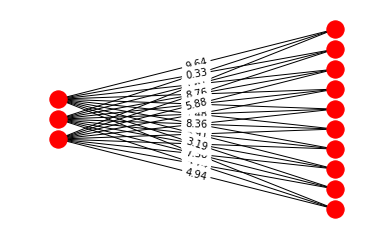

In [2]:
G = Graph.random_bipartite(3, 10, 0, 10)
Graph.draw_bipartite(G)

The following code solves the problem with the following parameters:
- t_max = 100
- t_min = 0
- k_t = 2

In [3]:
parameters = SimulatedAnnealingParameters(
    t_max=100,
    t_min=0,
    cooling_scheme=CoolingSchemeLinear(0.78),
    k_t=2,
    i_s2_observation_interval=1,
    i_s3_observation_interval=1
)

result = SimulatedAnnealing.execute(G, parameters)
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

100
100
99.22
99.22
97.66
97.66
95.32
95.32
92.19999999999999
92.19999999999999
88.29999999999998
88.29999999999998
83.61999999999998
83.61999999999998
78.15999999999998
78.15999999999998
71.91999999999999
71.91999999999999
64.89999999999999
64.89999999999999
57.099999999999994
57.099999999999994
48.519999999999996
48.519999999999996
39.16
39.16
29.019999999999996
29.019999999999996
18.099999999999994
18.099999999999994
6.399999999999993
6.399999999999993
Best total value 2.8699999999999997 found in 0.007570981979370117 time.


Let's draw the solution and solution improvement curve.

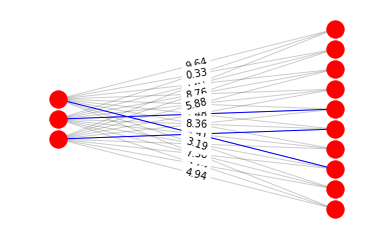

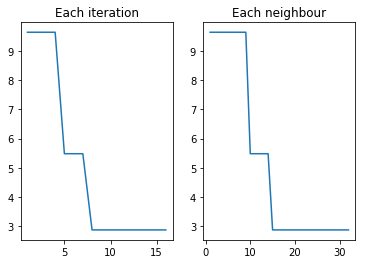

In [4]:
result.draw_solution()
result.draw_observations_plot()

Now let's genereate substantialy bigger graph 250x200 vertices and repeat the experiment using the same parameters.

100
100
99.22
99.22
97.66
97.66
95.32
95.32
92.19999999999999
92.19999999999999
88.29999999999998
88.29999999999998
83.61999999999998
83.61999999999998
78.15999999999998
78.15999999999998
71.91999999999999
71.91999999999999
64.89999999999999
64.89999999999999
57.099999999999994
57.099999999999994
48.519999999999996
48.519999999999996
39.16
39.16
29.019999999999996
29.019999999999996
18.099999999999994
18.099999999999994
6.399999999999993
6.399999999999993


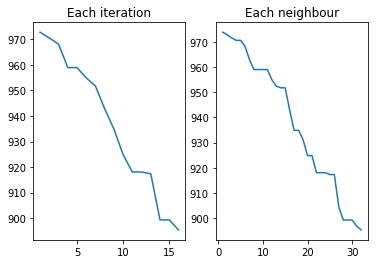

Best total value 895.4100000000001 found in 0.07022714614868164 time.


In [5]:
G = Graph.random_bipartite(250, 200, 0, 10)
result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

100
100
100
100
100
99.22
99.22
99.22
99.22
99.22
97.66
97.66
97.66
97.66
97.66
95.32
95.32
95.32
95.32
95.32
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
88.29999999999998
88.29999999999998
88.29999999999998
88.29999999999998
88.29999999999998
83.61999999999998
83.61999999999998
83.61999999999998
83.61999999999998
83.61999999999998
78.15999999999998
78.15999999999998
78.15999999999998
78.15999999999998
78.15999999999998
71.91999999999999
71.91999999999999
71.91999999999999
71.91999999999999
71.91999999999999
64.89999999999999
64.89999999999999
64.89999999999999
64.89999999999999
64.89999999999999
57.099999999999994
57.099999999999994
57.099999999999994
57.099999999999994
57.099999999999994
48.519999999999996
48.519999999999996
48.519999999999996
48.519999999999996
48.519999999999996
39.16
39.16
39.16
39.16
39.16
29.019999999999996
29.019999999999996
29.019999999999996
29.019999999999996
29.019999999999996
18.099999999999994
18.0999999999999

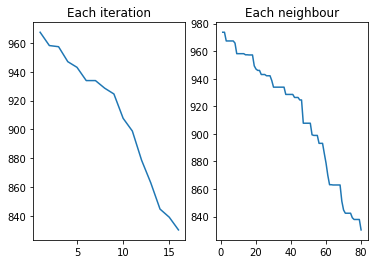

Best total value 830.3500000000006 found in 0.19235897064208984 time.


In [6]:
parameters.k_t = 5

result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
99.22
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
97.66
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
95.32
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999
92.19999999999999


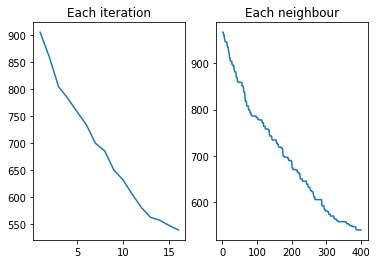

Best total value 539.1999999999997 found in 0.7326090335845947 time.


In [7]:
parameters.k_t = 25

result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

Not surprisingly we got much better results by increasing the the number of neighbours searched.
Let's test different cooling schemes.

In [8]:
parameters.cooling_scheme = CoolingSchemeExponential(0.5)

In [10]:
result = SimulatedAnnealing.execute(G, parameters)
result.draw_observations_plot()
print("Best total value %s found in %s time." % (result.solution.get_estimate(), result.total_time))

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
1.5625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.09765625
0.0030517578125
0.0030517578125


OverflowError: math range error